# Image Processing: Color Splicing

In [119]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [120]:
# read in `image.png`
img = cv2.imread('image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsi_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [121]:
# segment blue shirt
H_LOWER_BLUE = 110
S_LOWER_BLUE = 1.5

blue = np.copy(hsi_img)
blue[(blue[:, :, 0] < H_LOWER_BLUE) | (blue[:, :, 1] < S_LOWER_BLUE)] = 0

In [122]:
# segment skin color
H_LOWER_SKIN = 10
H_UPPER_SKIN = 18
S_LOWER_SKIN = 10

skin = np.copy(hsi_img)
skin[(skin[:, :, 0] < H_LOWER_SKIN) | (skin[:, :, 0] > H_UPPER_SKIN) | (skin[:, :, 1] < S_LOWER_SKIN)] = 0

In [123]:
# convert to RGB
blue = cv2.cvtColor(blue, cv2.COLOR_HSV2RGB)
skin = cv2.cvtColor(skin, cv2.COLOR_HSV2RGB)

C:\Users\fongc\AppData\Local\Temp\ipykernel_14100\380937872.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


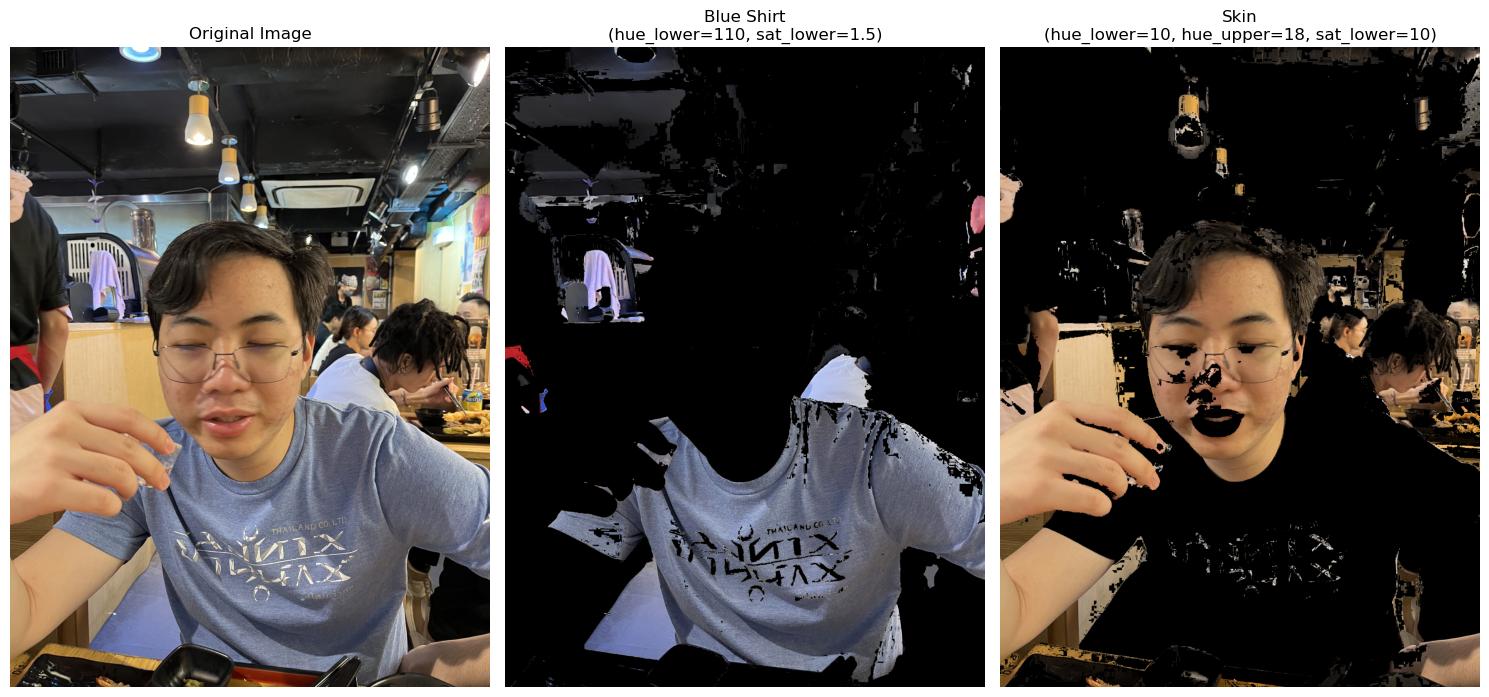

In [124]:
# plot
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[1].imshow(blue)
axes[1].set_title('Blue Shirt\n(hue_lower={}, sat_lower={})'.format(H_LOWER_BLUE, S_LOWER_BLUE))
axes[2].imshow(skin)
axes[2].set_title("Skin\n(hue_lower={}, hue_upper={}, sat_lower={})".format(H_LOWER_SKIN, H_UPPER_SKIN, S_LOWER_SKIN))
for i in range(3):
    axes[i].axis('off')
fig.tight_layout()
fig.show()